In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 12]

In [2]:
path =r'Home to Work - Sheet1.csv'
testDF = pd.read_csv(path)

In [3]:
testDF.head(5)

,Left Home,"December 11, 2018 at 08:39AM",Unnamed: 2,"https://maps.google.com/?q=53.369536272938745,-6.235619199999973&z=17"
0,Arrived At Work,"December 11, 2018 at 09:34AM",NaN,"https://maps.google.com/?q=53.334460546961814,..."
1,Left Work,"December 11, 2018 at 01:18PM",NaN,"https://maps.google.com/?q=53.334068956729624,..."
2,Arrived At Work,"December 11, 2018 at 01:53PM",NaN,"https://maps.google.com/?q=53.334460546961814,..."
3,Left Work,"December 11, 2018 at 06:33PM",NaN,"https://maps.google.com/?q=53.33402489271903,-..."
4,Arrived Home,"December 11, 2018 at 07:10PM",NaN,"https://maps.google.com/?q=53.36944512097854,-..."


In [4]:
testDF.drop(testDF.columns[2:],axis=1, inplace=True)
testDF.columns = ['Location', 'Time']
testDF.head(5)

,Location,Time
0,Arrived At Work,"December 11, 2018 at 09:34AM"
1,Left Work,"December 11, 2018 at 01:18PM"
2,Arrived At Work,"December 11, 2018 at 01:53PM"
3,Left Work,"December 11, 2018 at 06:33PM"
4,Arrived Home,"December 11, 2018 at 07:10PM"


In [5]:
dateTime = "December 11, 2018 at 09:34AM"
date_str1, time_str1 = dateTime.split(" at ") # Split the text date into data and time
print(date_str1)
print(time_str1)

December 11, 2018
09:34AM


In [6]:
date_dt1 = datetime.strptime(date_str1, '%B %d, %Y') # Applying strptime to the date portion of date
print(date_dt1)

2018-12-11 00:00:00


In [7]:
dateTime = "December 11, 2018 at 09:34AM"
dateTime = dateTime.replace(" at ", ", ") # replacing the at with a comma for processing (not necessary)
print(dateTime)
datetime_dt1 = datetime.strptime(dateTime, '%B %d, %Y, %I:%M%p') # Applying strptime to the whole dat and time string
print(datetime_dt1)

December 11, 2018, 09:34AM
2018-12-11 09:34:00


In [8]:
testDF['DateTime'] = testDF['Time'].apply( lambda x: datetime.strptime(x, '%B %d, %Y at %I:%M%p')) 
testDF.drop('Time', axis=1, inplace=True)
testDF.head(5)

,Location,DateTime
0,Arrived At Work,2018-12-11 09:34:00
1,Left Work,2018-12-11 13:18:00
2,Arrived At Work,2018-12-11 13:53:00
3,Left Work,2018-12-11 18:33:00
4,Arrived Home,2018-12-11 19:10:00


In [9]:
testDF['Elapsed'] = testDF['DateTime'].diff()
testDF['Elapsed Hours'] = testDF['Elapsed'] / np.timedelta64(1, 'h')
testDF['Time'] = testDF['DateTime'].apply(lambda x: x.time())

testDF['Previous Time'] = testDF['DateTime'] - testDF['Elapsed']
testDF = testDF.drop([0])
testDF['Previous Time'] = testDF['Previous Time'].apply(lambda x: x.time())

    
testDF.head(5)

,Location,DateTime,Elapsed,Elapsed Hours,Time,Previous Time
1,Left Work,2018-12-11 13:18:00,03:44:00,3.733333,13:18:00,09:34:00
2,Arrived At Work,2018-12-11 13:53:00,00:35:00,0.583333,13:53:00,13:18:00
3,Left Work,2018-12-11 18:33:00,04:40:00,4.666667,18:33:00,13:53:00
4,Arrived Home,2018-12-11 19:10:00,00:37:00,0.616667,19:10:00,18:33:00
5,Left Home,2018-12-11 19:47:00,00:37:00,0.616667,19:47:00,19:10:00


In [10]:
testDF = testDF.set_index('DateTime')
testDF.head(5)

,Location,Elapsed,Elapsed Hours,Time,Previous Time
DateTime,,,,,
2018-12-11 13:18:00,Left Work,03:44:00,3.733333,13:18:00,09:34:00
2018-12-11 13:53:00,Arrived At Work,00:35:00,0.583333,13:53:00,13:18:00
2018-12-11 18:33:00,Left Work,04:40:00,4.666667,18:33:00,13:53:00
2018-12-11 19:10:00,Arrived Home,00:37:00,0.616667,19:10:00,18:33:00
2018-12-11 19:47:00,Left Home,00:37:00,0.616667,19:47:00,19:10:00


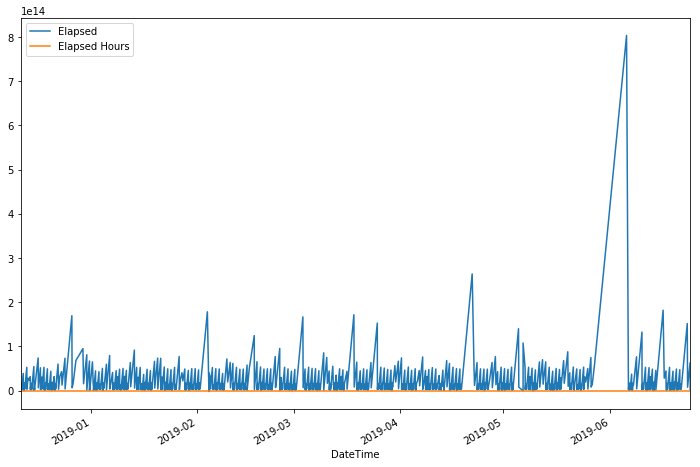

In [11]:
testDF.plot(figsize=(12,8))
plt.show()

In [12]:
workHours = testDF[testDF['Location'] == 'Left Work']
workHours.head(10)

,Location,Elapsed,Elapsed Hours,Time,Previous Time
DateTime,,,,,
2018-12-11 13:18:00,Left Work,03:44:00,3.733333,13:18:00,09:34:00
2018-12-11 18:33:00,Left Work,04:40:00,4.666667,18:33:00,13:53:00
2018-12-12 13:21:00,Left Work,04:53:00,4.883333,13:21:00,08:28:00
2018-12-12 17:10:00,Left Work,03:42:00,3.700000,17:10:00,13:28:00
2018-12-13 17:29:00,Left Work,07:48:00,7.800000,17:29:00,09:41:00
2018-12-14 13:03:00,Left Work,03:34:00,3.566667,13:03:00,09:29:00
2018-12-14 18:03:00,Left Work,04:34:00,4.566667,18:03:00,13:29:00
2018-12-17 17:12:00,Left Work,08:32:00,8.533333,17:12:00,08:40:00
2018-12-18 13:31:00,Left Work,03:54:00,3.900000,13:31:00,09:37:00


In [13]:
#workHours['Elapsed Hours'].plot(figsize=(12,8), kind='bar')
plt.show()

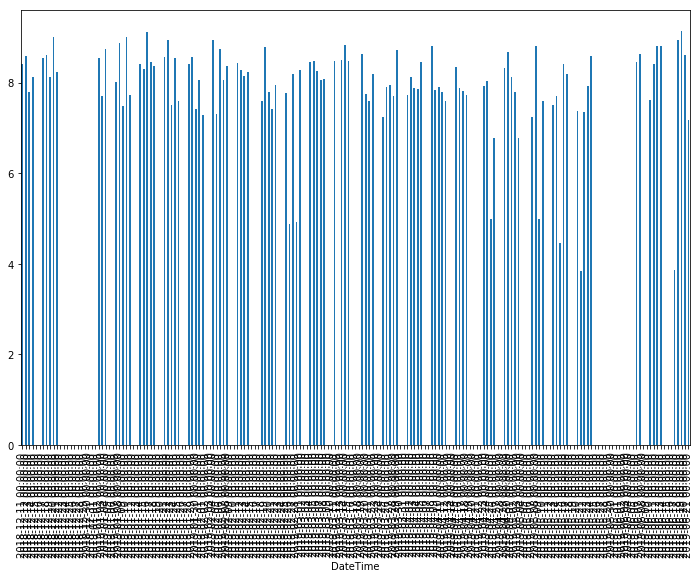

In [14]:
dailyWork = workHours.resample('D').sum()
dailyWork['Elapsed Hours'].plot(figsize=(12,8), kind='bar')

In [15]:
arriveTime = workHours = testDF[testDF['Location'] == 'Arrived At Work']
arriveTime = arriveTime[arriveTime['Elapsed Hours'] < 5]
arriveTime = arriveTime.between_time('08:00', '11:00')
arriveTime.head()

,Location,Elapsed,Elapsed Hours,Time,Previous Time
DateTime,,,,,
2018-12-12 08:28:00,Arrived At Work,00:32:00,0.533333,08:28:00,07:56:00
2018-12-13 09:41:00,Arrived At Work,00:53:00,0.883333,09:41:00,08:48:00
2018-12-14 09:29:00,Arrived At Work,00:46:00,0.766667,09:29:00,08:43:00
2018-12-17 08:40:00,Arrived At Work,00:38:00,0.633333,08:40:00,08:02:00
2018-12-18 09:37:00,Arrived At Work,00:44:00,0.733333,09:37:00,08:53:00


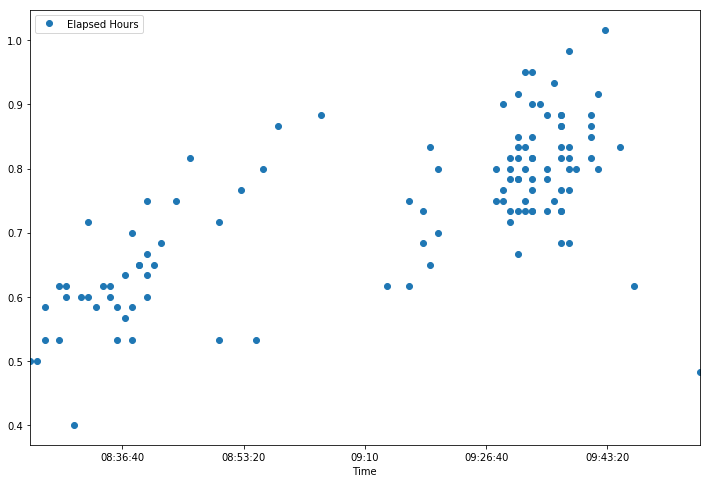

In [16]:
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator

arriveTime.plot(x='Time', y='Elapsed Hours', lw=0, marker='o', figsize=(12,8))